<a href="https://colab.research.google.com/github/sivasaiyadav8143/Deep-Learning-with-Python/blob/main/DeepLearningMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# for functional api based modeling

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

In [ ]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

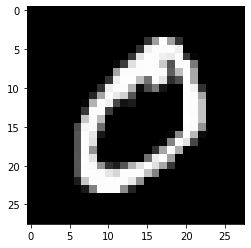

In [ ]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [ ]:
ytrain[1]

0

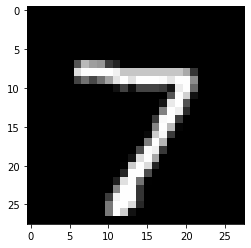

In [ ]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [ ]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [ ]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [ ]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [ ]:
x_test.shape

(10000, 784)

In [ ]:
x_train/=255
x_test/=255

In [ ]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [ ]:
# Initialize the constructor

model = Sequential()

In [ ]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 50us/sample - loss: 0.4053 - accuracy: 0.8887 - val_loss: 0.2047 - val_accuracy: 0.9416
Epoch 2/10
42000/42000 [==============================] - 2s 43us/sample - loss: 0.1486 - accuracy: 0.9562 - val_loss: 0.1393 - val_accuracy: 0.9591
Epoch 3/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0956 - accuracy: 0.9730 - val_loss: 0.1261 - val_accuracy: 0.9639
Epoch 4/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0679 - accuracy: 0.9805 - val_loss: 0.1060 - val_accuracy: 0.9699
Epoch 5/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0493 - accuracy: 0.9859 - val_loss: 0.1005 - val_accuracy: 0.9704
Epoch 6/10
42000/42000 [==============================] - 2s 42us/sample - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.1001 - val_accuracy: 0.9698
Epoch 7/10
42000/42000 [==============================] 

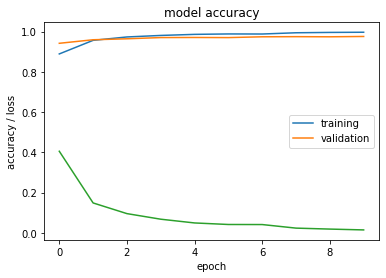

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.979
Loss: 0.067


In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict[0]

array([1.3749526e-07, 1.4818089e-07, 2.5936920e-06, 2.9427558e-05,
       1.5401396e-09, 2.5186750e-08, 1.3855177e-10, 9.9996424e-01,
       1.5439882e-07, 3.3092745e-06], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

In [ ]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 973    1    1    1    0    1    1    1    1    0]
 [   0 1130    1    1    0    1    2    0    0    0]
 [   5    3 1011    4    0    0    1    4    4    0]
 [   0    1    0  997    0    2    0    4    5    1]
 [   2    1    4    0  956    0    1    1    1   16]
 [   2    0    0    9    1  864    6    0    7    3]
 [   9    3    1    1    4    6  931    0    3    0]
 [   1    7    8    4    0    0    0 1000    4    4]
 [   5    0    2    8    2    3    1    3  946    4]
 [   2    3    0    3    6    2    0    4    2  987]]


In [ ]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Using functional api

In [ ]:
Input_layer = Input(shape=(784,))  #defining input layer
First_hidden = Dense(500 , activation='relu')(Input_layer)
Second_hidden = Dense(100, activation='relu')(First_hidden)
Output_layer = Dense(10, activation='softmax')(Second_hidden)
model = Model(inputs=Input_layer, outputs=Output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_27 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_28 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=.3, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 45us/sample - loss: 0.4734 - accuracy: 0.8697 - val_loss: 0.2364 - val_accuracy: 0.9321
Epoch 2/10
42000/42000 [==============================] - 1s 31us/sample - loss: 0.1824 - accuracy: 0.9472 - val_loss: 0.1722 - val_accuracy: 0.9502
Epoch 3/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.1201 - accuracy: 0.9657 - val_loss: 0.1382 - val_accuracy: 0.9601
Epoch 4/10
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0910 - accuracy: 0.9732 - val_loss: 0.1208 - val_accuracy: 0.9632
Epoch 5/10
42000/42000 [==============================] - 1s 34us/sample - loss: 0.0676 - accuracy: 0.9805 - val_loss: 0.1044 - val_accuracy: 0.9692
Epoch 6/10
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0606 - accuracy: 0.9821 - val_loss: 0.0955 - val_accuracy: 0.9717
Epoch 7/10
42000/42000 [==============================] 

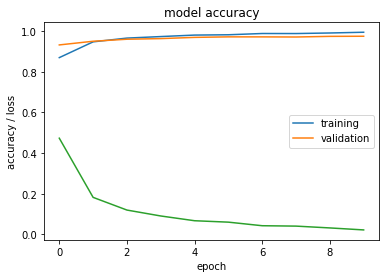

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()


In [ ]:
y_predict = model.predict(x_test)

In [ ]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

